In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_full = pd.read_csv("nobk_data/train.csv")
df_full.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


# Analyze output

<AxesSubplot:>

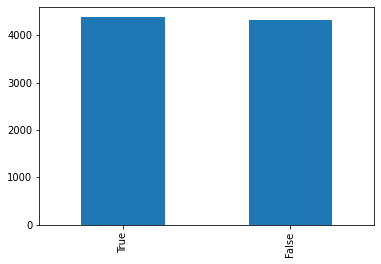

In [3]:
y_col = "Transported"
df_full[y_col].value_counts().plot.bar()

Good, it's balanced. Nothing to do

# Analyze features

In [4]:
df_full.shape

(8693, 14)

In [5]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


**Obs:** Most columns have some null values

In [6]:
feature_cols = filter(lambda col: col not in (y_col, "PassengerId"), df_full.columns)
df_full[feature_cols].describe(include="all")

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
count,8492,8476,8494,8511,8514.000000,8490,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8493
unique,3,2,6560,3,NaN,2,NaN,NaN,NaN,NaN,NaN,8473
top,Earth,False,G/734/S,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Gollux Reedall
freq,4602,5439,8,5915,NaN,8291,NaN,NaN,NaN,NaN,NaN,2
mean,NaN,NaN,NaN,NaN,28.827930,NaN,224.687617,458.077203,173.729169,311.138778,304.854791,NaN
std,NaN,NaN,NaN,NaN,14.489021,NaN,666.717663,1611.489240,604.696458,1136.705535,1145.717189,NaN
min,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,NaN,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,NaN,NaN,NaN,NaN,38.000000,NaN,47.000000,76.000000,27.000000,59.000000,46.000000,NaN


### Observations

#### Categorical features

* HomePlanet has 3 unique values -> one-hot-encoder
* CryoSleep is a boolean column
* Cabin needs some processing to split into deck/num/side
* Destination hast 3 values -> one-hot-encoder
* VIP boolean (mostly False)

#### Numeric features

* Age
* RoomService, FoodCourt, ShoppingMall, Spa, VRDeck => amount billed in luxury amenities (check conjunt behavior)

## Train test split

In [7]:
MAGIC_NUM = 42
np.random.seed = MAGIC_NUM

In [8]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df_full, stratify=df_full[y_col])

## HomePlanet

<AxesSubplot:>

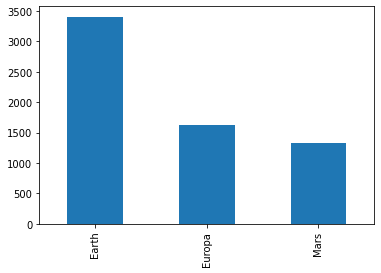

In [9]:
df_train["HomePlanet"].value_counts().plot.bar()

Mode: Earth

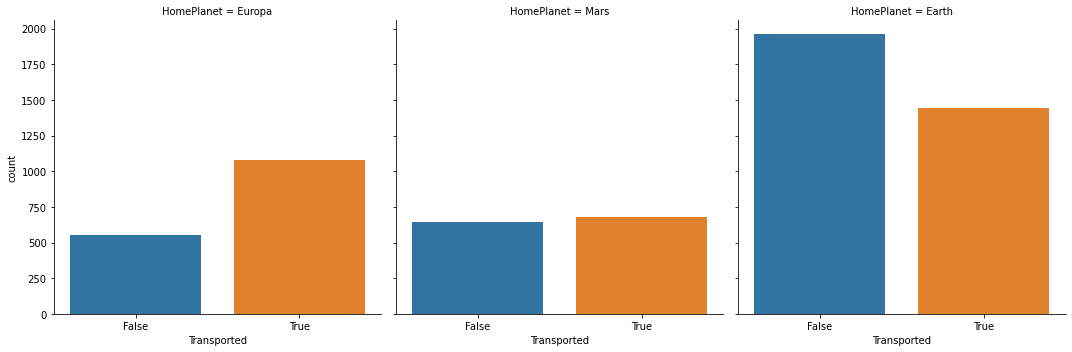

In [10]:
# check behavior of output against HomePlanet
sns.catplot(data=df_train[df_train["HomePlanet"].notnull()],
          col="HomePlanet", x=y_col, kind="count")

There is a tendency when HomePlanet is Europa or Earth

In [11]:
# check percentage of null in HomePlanet
df_train["HomePlanet"].isna().sum() / df_train.shape[0]

0.024236846142046325

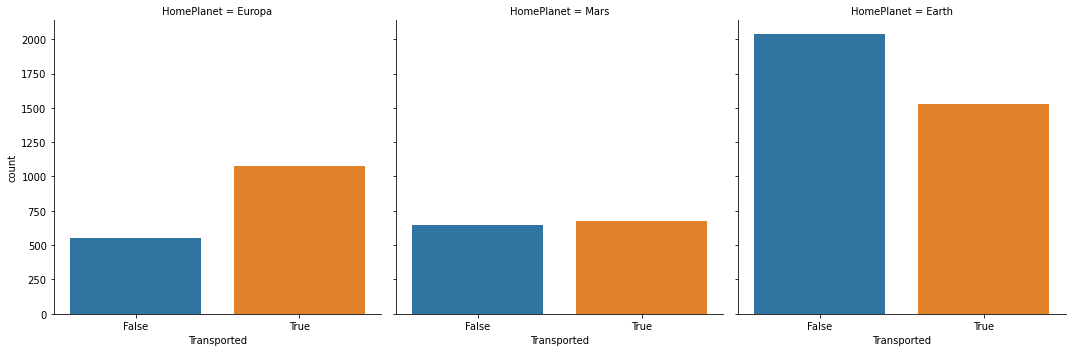

In [12]:
# let's see how changes tendency if null values are filled with mode "Earth"
df_aux = df_train.copy()
df_aux["HomePlanet"].fillna("Earth", inplace=True)
sns.catplot(data=df_aux, col="HomePlanet", x=y_col, kind="count")

Not much change, then add this step

In [13]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
cat_pipeline_dict = {}

In [59]:
class HomePlanetNullHandler(BaseEstimator, TransformerMixin):
  def fit(self, X):
    return self
  def transform(self, X):
    X_out = X.copy()
    X_out["HomePlanet"] = X_out["HomePlanet"].fillna("Earth")
    return X_out
cat_pipeline_dict["home_planet_null_handler"] = HomePlanetNullHandler()

## CryoSleep

<AxesSubplot:>

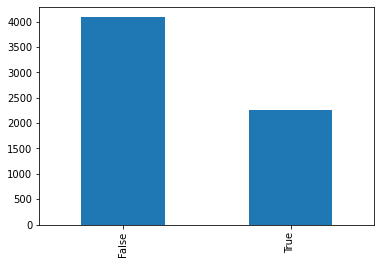

In [15]:
df_train["CryoSleep"].value_counts().plot.bar()

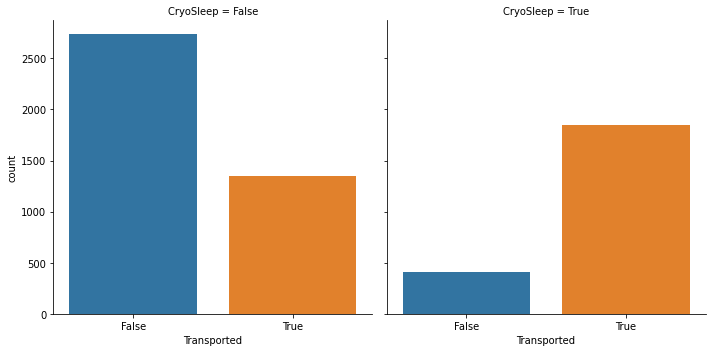

In [16]:
sns.catplot(data=df_train[df_train["CryoSleep"].notnull()], col="CryoSleep", x=y_col, kind="count")

In [17]:
df_train["CryoSleep"].isna().sum() / df_train.shape[0]

0.0263844147875441

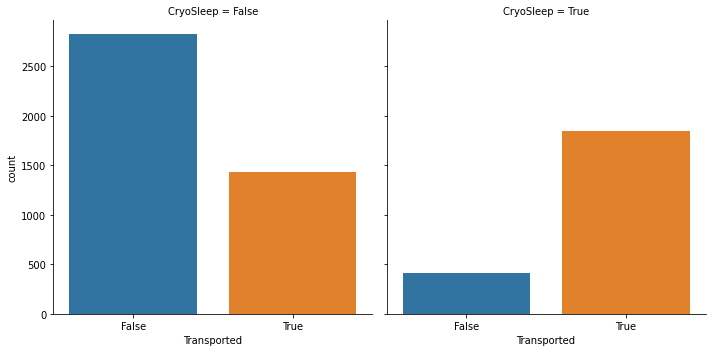

In [18]:
df_aux = df_train.copy()
df_aux["CryoSleep"].fillna(False, inplace=True)
sns.catplot(data=df_aux, col="CryoSleep", x=y_col, kind="count")

In [60]:
class CryoSleepNullHandler(BaseEstimator, TransformerMixin):
  def fit(self, X):
    return self
  def transform(self, X):
    X_out = X.copy()
    X_out["CryoSleep"] = X_out["CryoSleep"].fillna(False)
    return X_out
cat_pipeline_dict["cryo_sleep_null_handler"] = CryoSleepNullHandler()

## Destination

<AxesSubplot:>

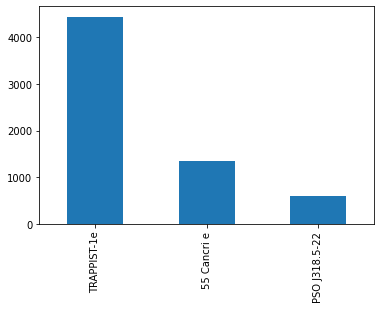

In [20]:
df_train["Destination"].value_counts().plot.bar()

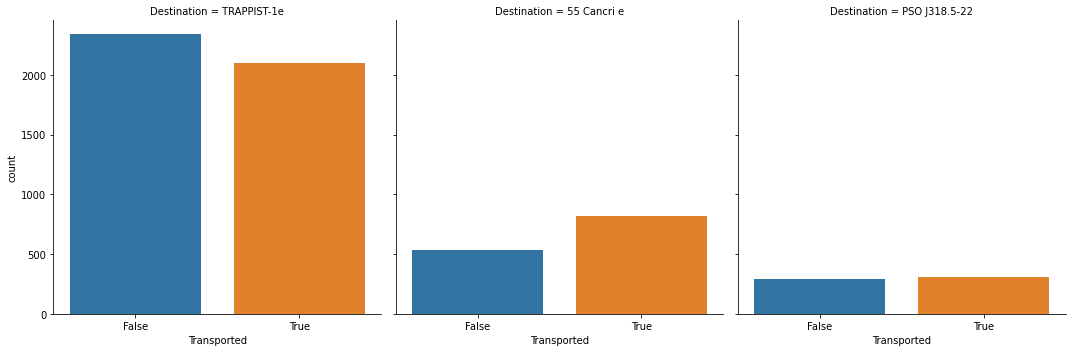

In [21]:
sns.catplot(data=df_train[df_train["Destination"].notnull()], col="Destination", x=y_col, kind="count")

Doesn't look like destination influences directly to the output

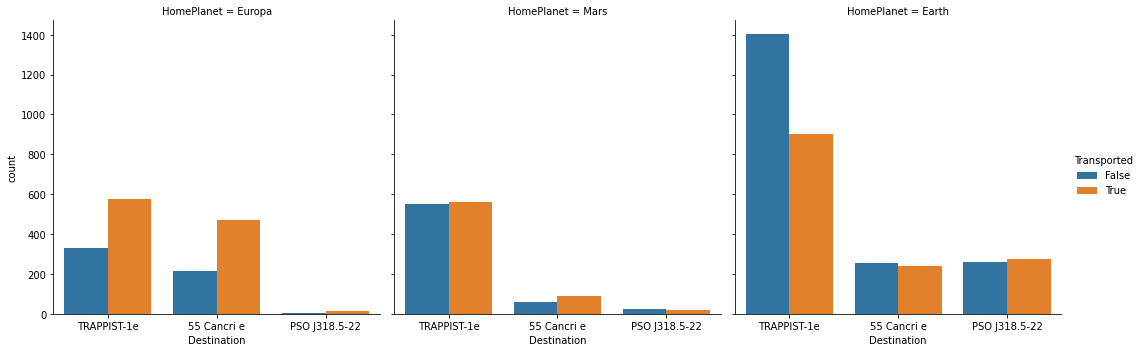

In [22]:
# let's check if combined with home_planet make any diference
sns.catplot(data=Pipeline(cat_pipeline_dict.items()).fit_transform(df_train),
        col="HomePlanet", hue=y_col, x="Destination", kind="count")

Destination is important when home_planet=Earth and Destination=TRAPPIST-1e

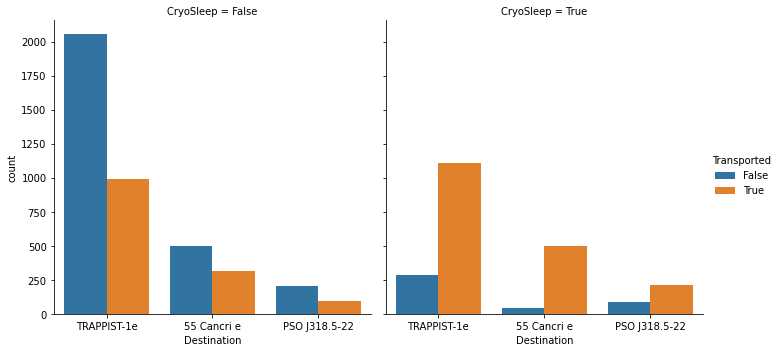

In [23]:
# let's check the influence in cryo_sleep
sns.catplot(data=Pipeline(cat_pipeline_dict.items()).fit_transform(df_train),
        col="CryoSleep", hue=y_col, x="Destination", kind="count")

Makes no difference, then let's  join home_planet with destination to get a better feature

In [24]:
df_full["Destination"].isna().sum() / df_full.shape[0]

0.02093638559760727

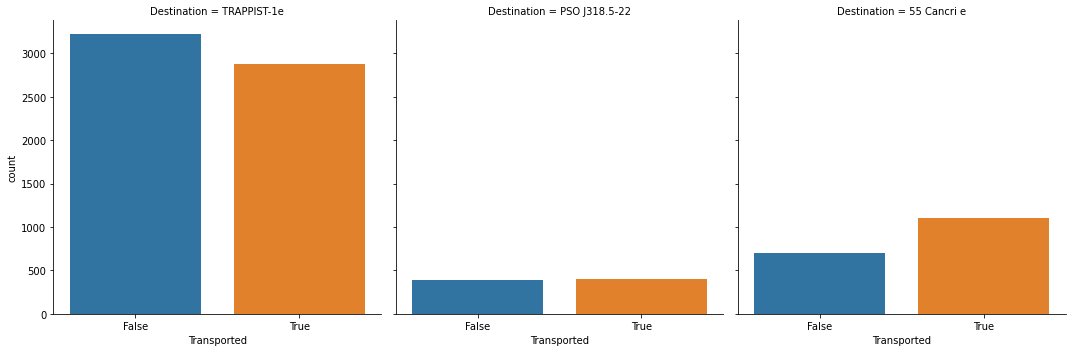

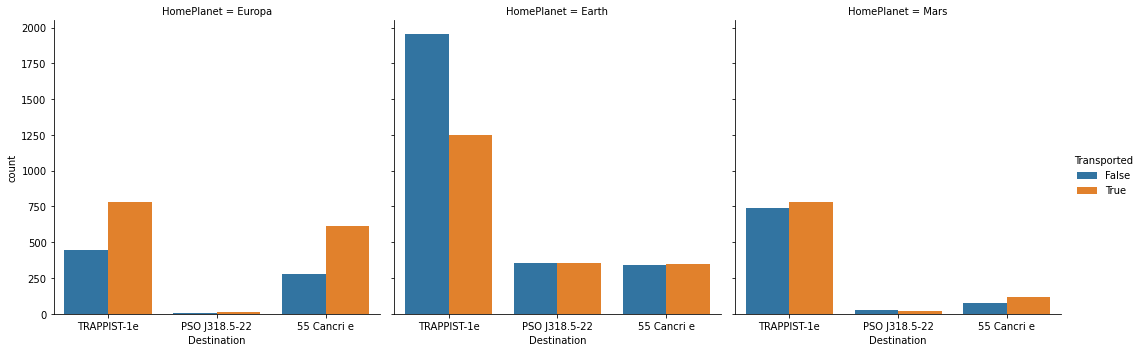

In [25]:
df_aux = df_full.copy()
df_aux["Destination"].fillna("TRAPPIST-1e", inplace=True)
sns.catplot(data=df_aux, col="Destination", x=y_col, kind="count")
sns.catplot(data=Pipeline(cat_pipeline_dict.items()).fit_transform(df_aux), col="HomePlanet", x="Destination", hue=y_col, kind="count")

In [61]:
class DestinationNullHandler(BaseEstimator, TransformerMixin):
  def fit(self, X):
    return self
  def transform(self, X):
    X_out = X.copy()
    X_out["Destination"] = X_out["Destination"].fillna("TRAPPIST-1e")
    return X_out
cat_pipeline_dict["destination_null_handler"] = DestinationNullHandler()

In [62]:
class TravelColAdder(BaseEstimator, TransformerMixin):
  def fit(self, X):
    return self
  def transform(self, X):
    X_out = X.copy()
    X_out["orig_dest"] = X_out["HomePlanet"] + "-" + X_out["Destination"]
    return X_out.drop(columns=["HomePlanet", "Destination"])
cat_pipeline_dict["travel_col_adder"] = TravelColAdder()

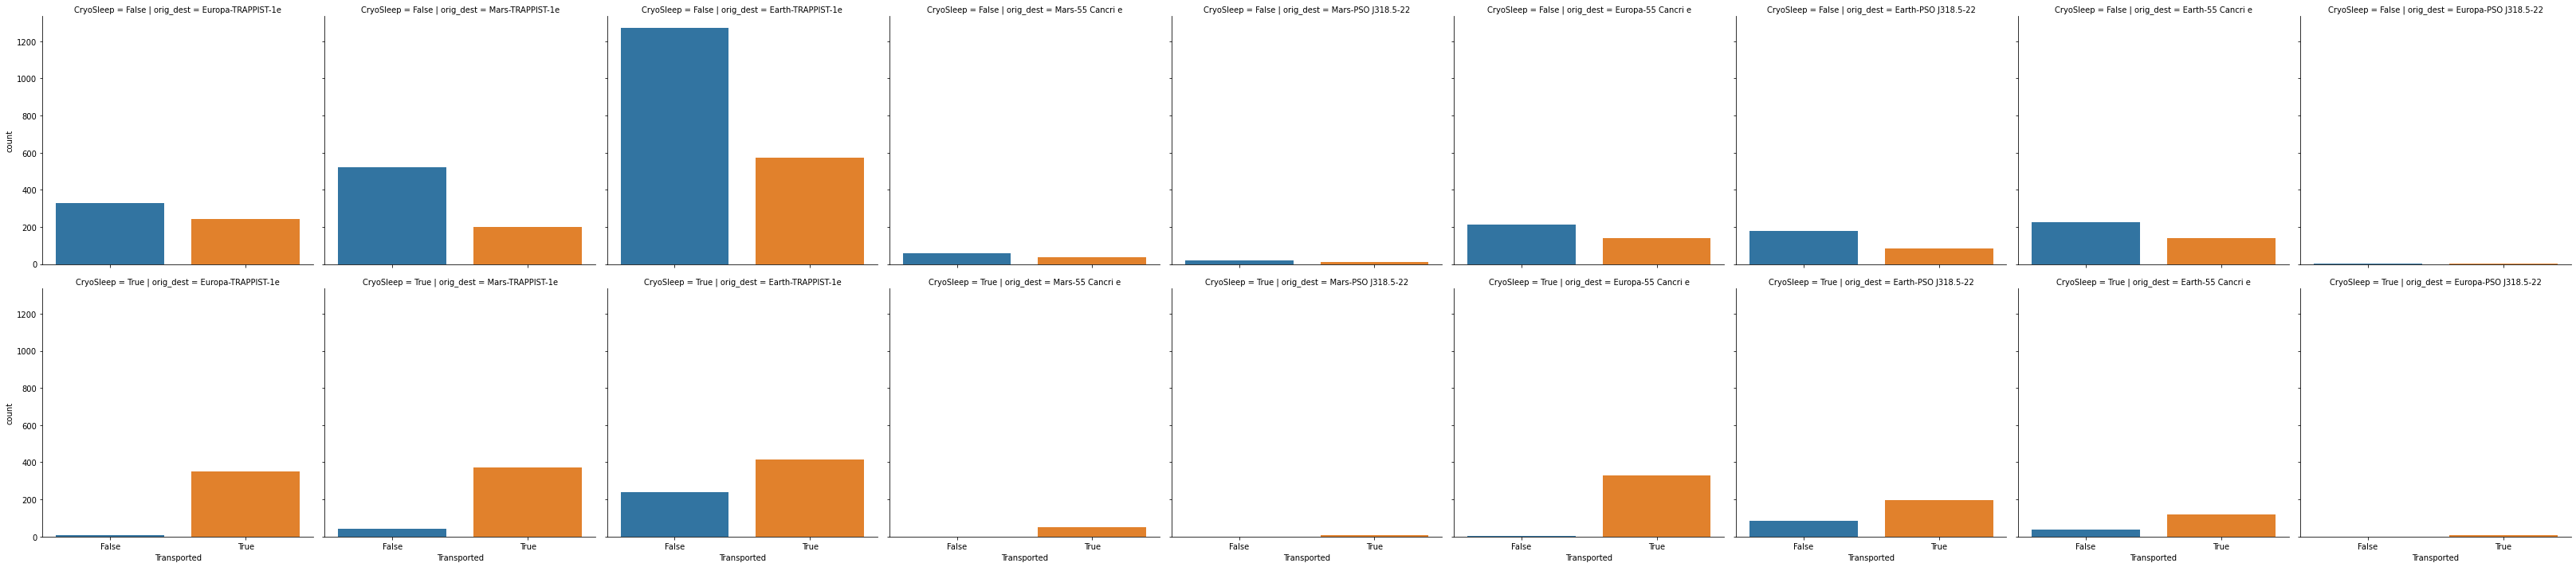

In [28]:
sns.catplot(data=Pipeline(cat_pipeline_dict.items()).fit_transform(df_train),
                  col="orig_dest", x=y_col, row="CryoSleep", kind="count")

## VIP

<AxesSubplot:>

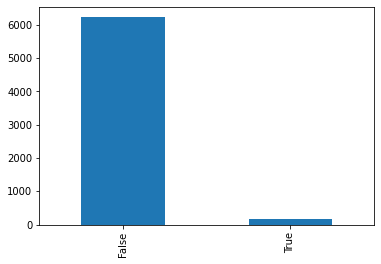

In [29]:
df_train["VIP"].value_counts().plot.bar()

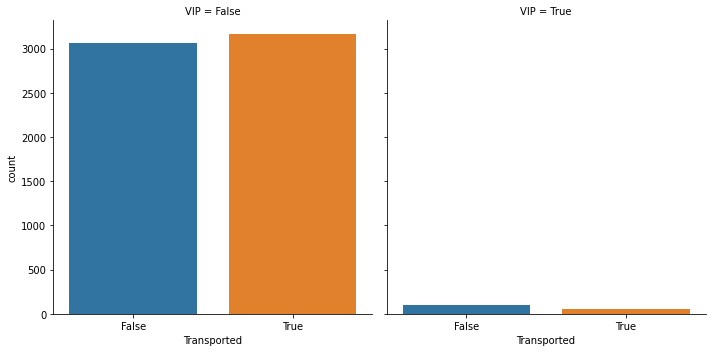

In [30]:
sns.catplot(data=df_train[df_train["VIP"].notnull()], col="VIP", x=y_col, kind="count")

Not much info from VIP, then drop it

In [63]:
class VipColDropper(BaseEstimator, TransformerMixin):
  def fit(self, X):
    return self
  def transform(self, X):
    return X.drop(columns=["VIP"])
cat_pipeline_dict["vip_col_dropper"] = VipColDropper()

## Cabin

In [32]:
df_train["deck"], df_train["num"], df_train["side"] = zip(*df_train["Cabin"].map(lambda x: x.split("/") if not pd.isna(x) else (np.nan, np.nan, np.nan)))

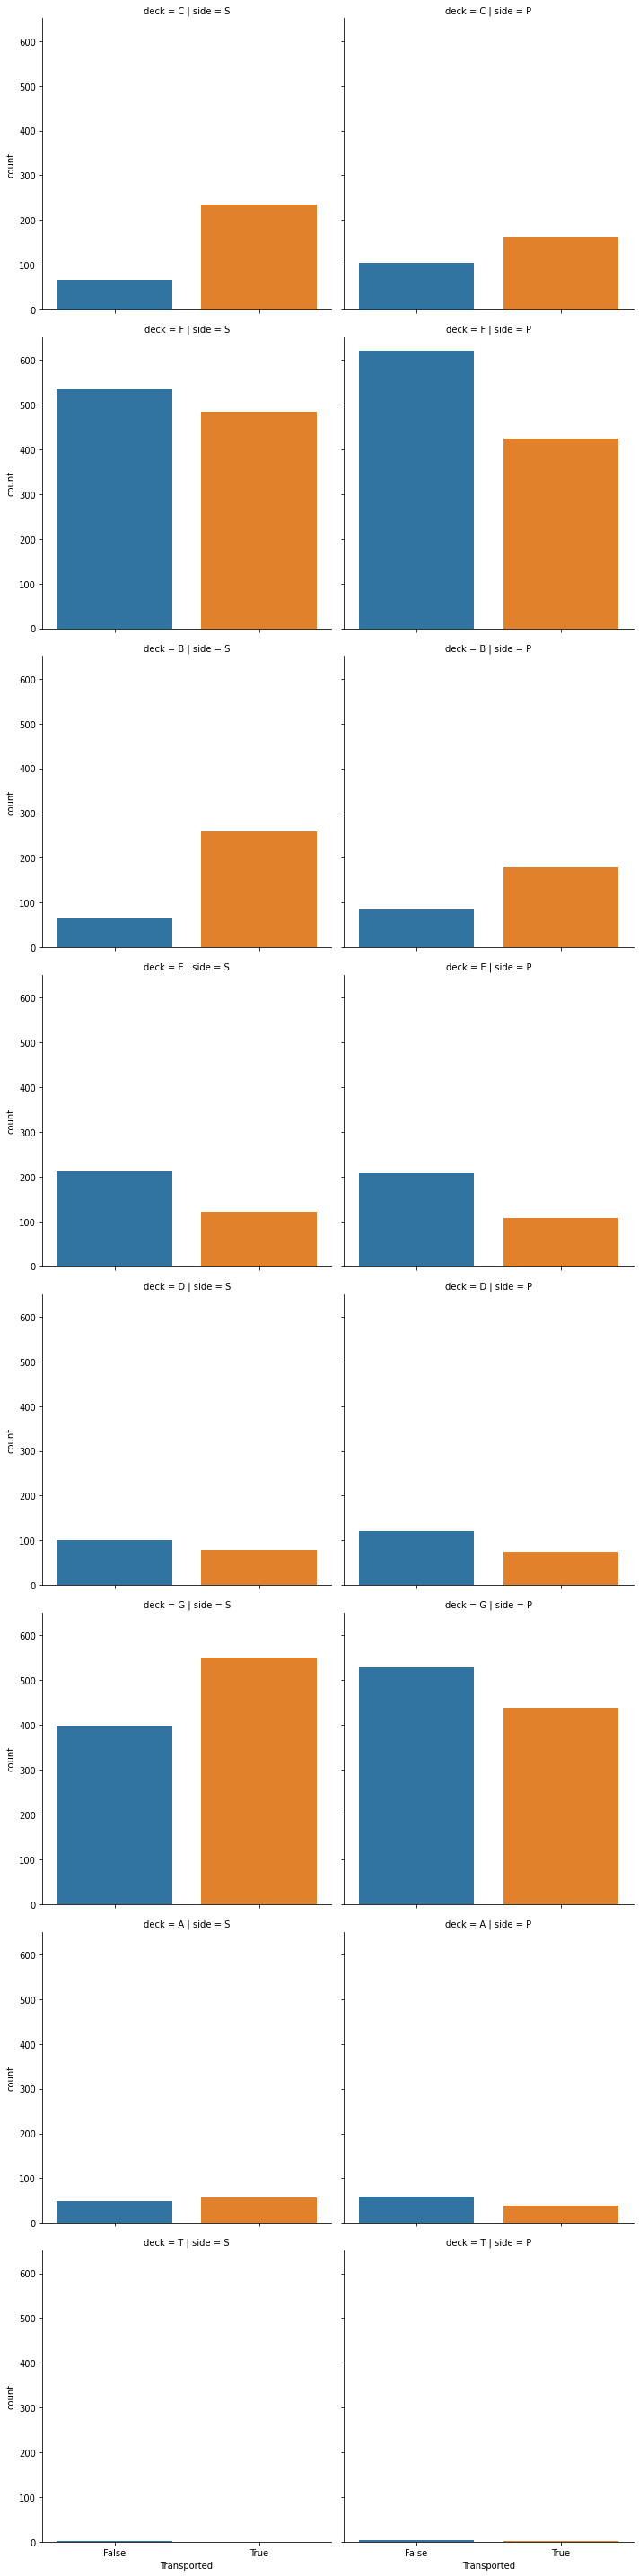

In [33]:
sns.catplot(data=df_train[df_train["deck"].notnull()], 
            x=y_col, row="deck", col="side", kind="count")

Doesn't look like Cabin influences in the output

## Age

<AxesSubplot:xlabel='Age', ylabel='Count'>

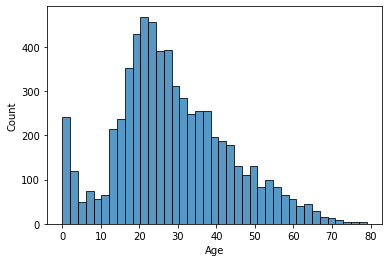

In [34]:
sns.histplot(data=df_train.loc[df_train["Age"].notnull()], x="Age")

<AxesSubplot:xlabel='Age', ylabel='Count'>

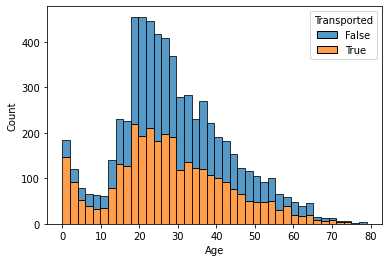

In [35]:
sns.histplot(data=df_train.loc[df_train["Age"].notnull()], x="Age", hue=y_col, multiple="stack", bins=40)

Ages looks that only matter when below to 12, else there are the same quantity for transported with not transported.
So let's convert into a categorical variable

<AxesSubplot:xlabel='Age', ylabel='Count'>

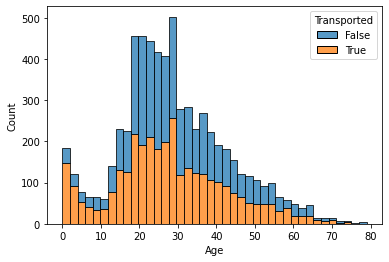

In [36]:
# check if we replace nan by mean
df_aux = df_train.copy()
df_aux["Age"].fillna(df_aux["Age"].mean(), inplace=True)
sns.histplot(data=df_aux, x="Age", hue=y_col, multiple="stack", bins=40)

In [37]:
num_pipeline_dict = {}

In [64]:
class AgeCatTransformer(BaseEstimator, TransformerMixin):
  def fit(self, X):
    return self
  def transform(self, X):
    X_out = X.copy()
    # let's fill nan
    X_out["is_child"] = X_out["Age"].fillna(X_out["Age"].mean()) <= 12
    return X_out.drop(columns=["Age"])
num_pipeline_dict["age_cat_transformer"] = AgeCatTransformer()

## Check luxury columns

array([[<AxesSubplot:title={'center':'RoomService'}>,
        <AxesSubplot:title={'center':'FoodCourt'}>],
       [<AxesSubplot:title={'center':'ShoppingMall'}>,
        <AxesSubplot:title={'center':'Spa'}>],
       [<AxesSubplot:title={'center':'VRDeck'}>, <AxesSubplot:>]],
      dtype=object)

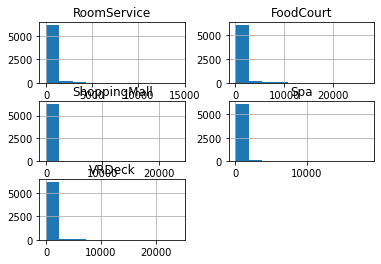

In [39]:
lux_cols = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
df_train[lux_cols].hist()

array([[<AxesSubplot:title={'center':'RoomService'}>,
        <AxesSubplot:title={'center':'FoodCourt'}>],
       [<AxesSubplot:title={'center':'ShoppingMall'}>,
        <AxesSubplot:title={'center':'Spa'}>],
       [<AxesSubplot:title={'center':'VRDeck'}>, <AxesSubplot:>]],
      dtype=object)

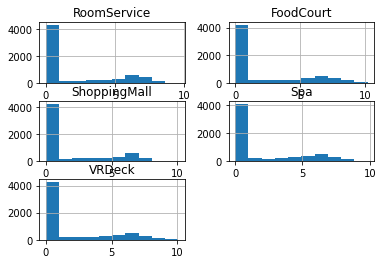

In [40]:
(df_train[lux_cols]+1).apply(np.log).hist()

<AxesSubplot:>

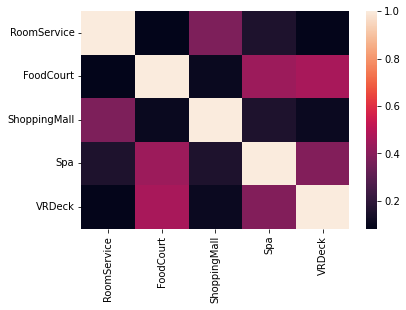

In [41]:
corrs = (df_train[lux_cols]+1).apply(np.log).corr()
sns.heatmap(corrs)

Many passengers haven't paid any luxury, then probably the best to create a column indicating if paid for at least one luxury

In [65]:
class LuxuryCatTransformer(BaseEstimator, TransformerMixin):
  def fit(self, X):
    return self
  def transform(self, X):
    X_out = X.copy()
    X_out[lux_cols] = X_out[lux_cols].fillna(0)
    X_out["luxury"] = X_out[lux_cols].sum(axis="columns") > 0
    return X_out.drop(columns=lux_cols)
num_pipeline_dict["luxury_cat_transformer"] = LuxuryCatTransformer()

# Build final pipeline

In [66]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline

df_submission = pd.read_csv("nobk_data/test.csv")

cat_columns = ["HomePlanet", "Destination", "CryoSleep", "VIP"]
num_columns = ["Age"] + lux_cols

In [67]:
full_pipeline = make_pipeline(
  ColumnTransformer([
    ("cat_pipeline", Pipeline(list(cat_pipeline_dict.items())), cat_columns),
    ("num_pipeline", Pipeline(list(num_pipeline_dict.items())), num_columns),
  ]),
  OneHotEncoder(),
)
df_train_treated = full_pipeline.fit_transform(df_train)
df_test_treated = full_pipeline.transform(df_test)
df_sub_treated = full_pipeline.transform(df_submission)

# Train models

## Random Forest

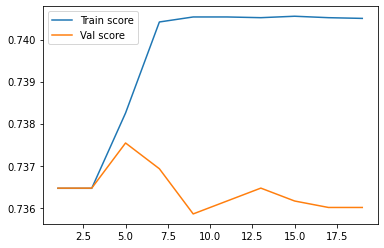

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate

train_scores = []
val_scores = []
mds = np.arange(1, 20, 2)
for md in mds:
  rfc = RandomForestClassifier(max_depth=md, n_estimators=20)
  scores = cross_validate(rfc, df_train_treated, df_train[y_col],
                cv=10, scoring="accuracy", return_train_score=True)
  train_scores.append(scores["train_score"].mean())
  val_scores.append(scores["test_score"].mean())

_, ax = plt.subplots()
ax.plot(mds, train_scores, label="Train score")
ax.plot(mds, val_scores, label="Val score")
ax.legend()


In [89]:
model = RandomForestClassifier(max_depth=5, n_estimators=20)
model.fit(df_train_treated, df_train[y_col])
y_train = model.predict(df_train_treated)
print("Train accuracy:", accuracy_score(df_train[y_col], y_train))
y_test = model.predict(df_test_treated)
print("Test accuracy:", accuracy_score(df_test[y_col], y_test))

Train accuracy: 0.7378432274888787
Test accuracy: 0.7401103955841767


In [90]:
df_submission[y_col] = model.predict(df_sub_treated)
df_submission[["PassengerId", y_col]].to_csv("random_forest_out.csv", index=False)

## Logistic Regression

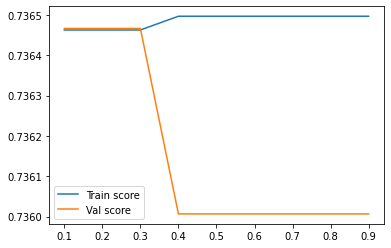

In [95]:
from sklearn.linear_model import LogisticRegression

train_scores = []
val_scores = []
Cs = np.arange(.1, 1, .1)
for c in Cs:
  lr = LogisticRegression(C=c)
  scores = cross_validate(lr, df_train_treated, df_train[y_col],
                cv=10, scoring="accuracy", return_train_score=True)
  train_scores.append(scores["train_score"].mean())
  val_scores.append(scores["test_score"].mean())

_, ax = plt.subplots()
ax.plot(Cs, train_scores, label="Train score")
ax.plot(Cs, val_scores, label="Val score")
ax.legend()


In [96]:
model = LogisticRegression(C=.3)
model.fit(df_train_treated, df_train[y_col])
y_train = model.predict(df_train_treated)
print("Train accuracy:", accuracy_score(df_train[y_col], y_train))
y_test = model.predict(df_test_treated)
print("Test accuracy:", accuracy_score(df_test[y_col], y_test))

Train accuracy: 0.7364626476453444
Test accuracy: 0.7391904323827047


In [97]:
df_submission[y_col] = model.predict(df_sub_treated)
df_submission[["PassengerId", y_col]].to_csv("log_reg_out.csv", index=False)